In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import matplotlib.pylab as plt
import healpy as hp
import time

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/utils.py:27: UserWarning: Could not import ts.scheduler. This is required to load the FieldsDatabase. In this case
it will fallback to loading fields from the local "fieldID.lis" file.
  it will fallback to loading fields from the local "fieldID.lis" file.''')


In [2]:
survey_length = 31.28  # days
nside = fs.set_default_nside(nside=32)
years = np.round(survey_length/365.25)
filtername = 'r'

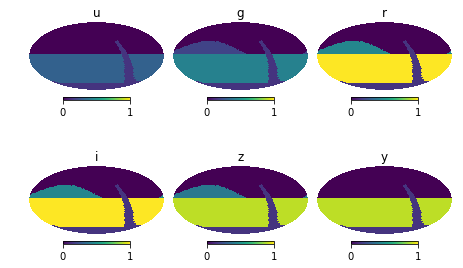

In [35]:
target_map = fs.standard_goals(nside=nside)
for i, fn in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    hp.mollview(target_map[fn], title=fn, sub=(2,3, i+1), min=0, max=1)
plt.savefig('all_targets.pdf')

In [3]:
target_map = fs.standard_goals(nside=nside)[filtername]

[ 0.    0.15  0.46  1.  ]


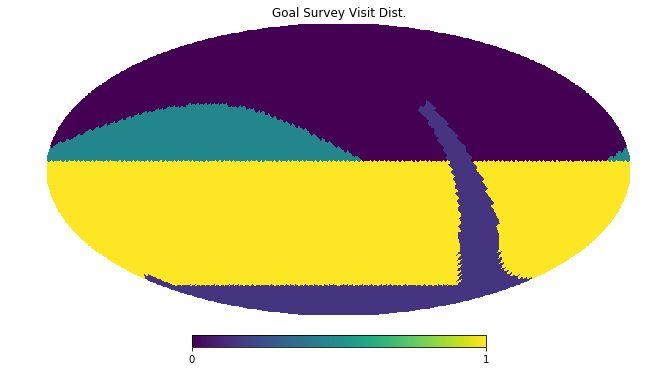

In [4]:
hp.mollview(target_map, title='Goal Survey Visit Dist.')
plt.savefig('goal_map.pdf')
print(np.unique(target_map))

In [5]:
# How to normalize the basis function
norm_factor = fs.calc_norm_factor({'r':target_map})

In [6]:
# List to hold basis functions
bfs = []

bfs.append(fs.M5_diff_basis_function(filtername=filtername, nside=nside))
bfs.append(fs.Target_map_basis_function(filtername=filtername,
                                            target_map=target_map,
                                            out_of_bounds_val=hp.UNSEEN, nside=nside,
                                            norm_factor=norm_factor))
bfs.append(fs.Slewtime_basis_function(filtername=filtername, nside=nside))

weights = [1., 1., 0.3]

In [7]:
survey = fs.Greedy_survey_fields(bfs, weights, block_size=1, filtername=filtername,
                                           dither=True, nside=nside, ignore_obs='DD')

In [8]:
scheduler = fs.Core_scheduler([survey], nside=nside)

In [9]:
observatory = Speed_observatory(nside=nside, quickTest=True)

In [10]:
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='example_%iyrs.db' % years,
                                                     delete_past=True)

/Users/yoachim/gitRepos/sims_seeingModel/python/lsst/sims/seeingModel/seeingModel.py:133: RuntimeWarning: invalid value encountered in power
  airmass_correction = np.power(airmass, 0.6)


progress = 27.4%

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:313: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:229: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')


progress = 99.9%Skipped 0 observations
Completed 17057 observations


In [11]:
# make sure we are in the filter so all the basis functions compute
status = observatory.return_status()
#status['filter'] = filtername
#scheduler.update_conditions(status)
rot = (status['lmst']*360./24., observatory.site.latitude, )

/Users/yoachim/gitRepos/sims_seeingModel/python/lsst/sims/seeingModel/seeingModel.py:133: RuntimeWarning: invalid value encountered in power
  airmass_correction = np.power(airmass, 0.6)


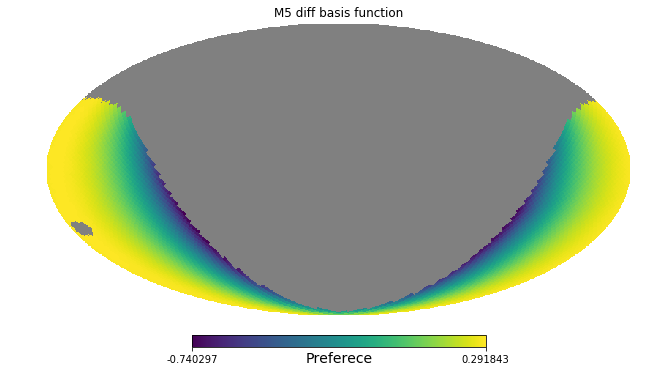

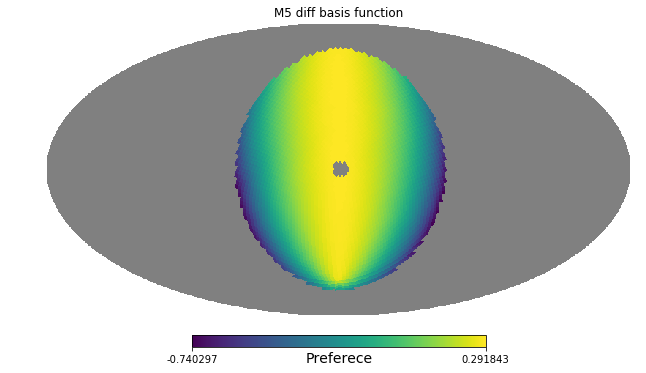

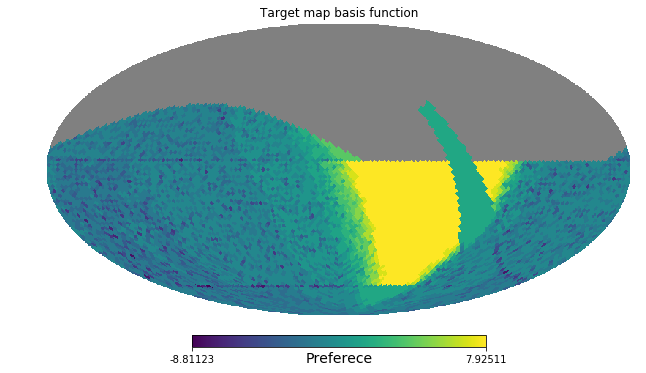

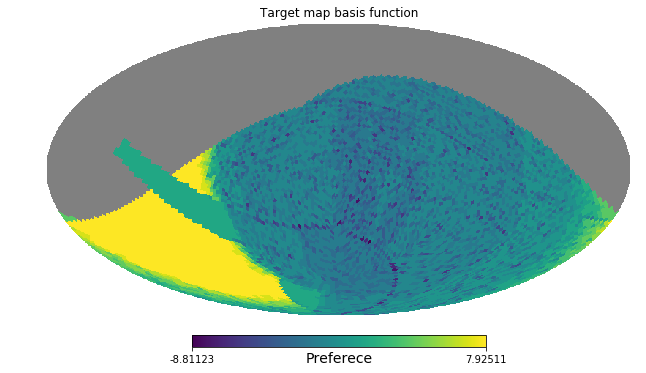

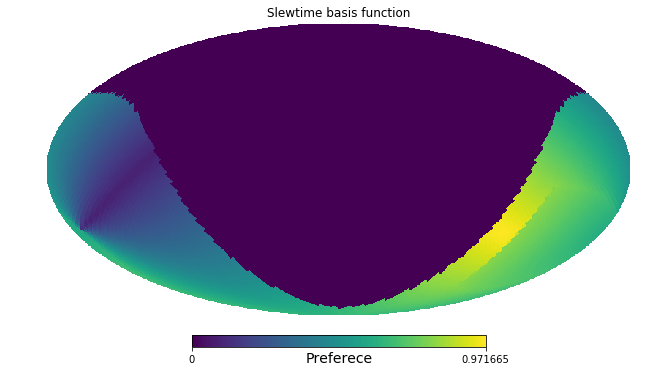

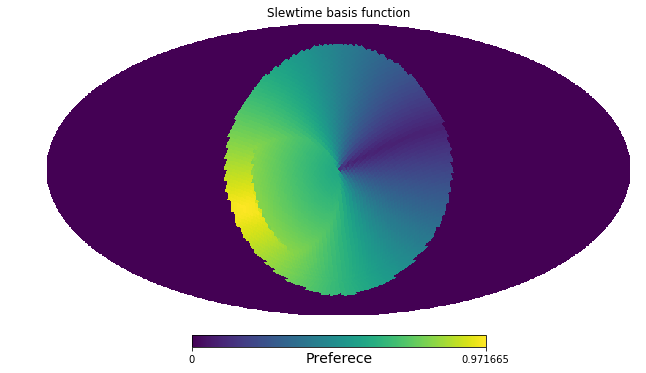

In [12]:
for bf in bfs:
    name = bf.__class__.__name__.replace('_', ' ')
    name2= bf.__class__.__name__.replace('_basis_function', ' ')
    hp.mollview(bf(), unit='Preferece', title=name)
    plt.savefig(name2+'.pdf')
    hp.mollview(bf(), rot=rot, unit='Preferece', title=name)
    plt.savefig(name2+'_altaz'+'.pdf')

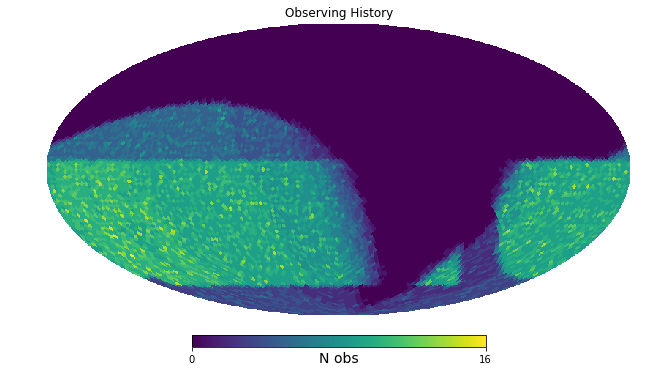

In [13]:
hp.mollview(bfs[1].survey_features['N_obs'].feature, title='Observing History', unit='N obs')
plt.savefig('obs_hist.pdf')

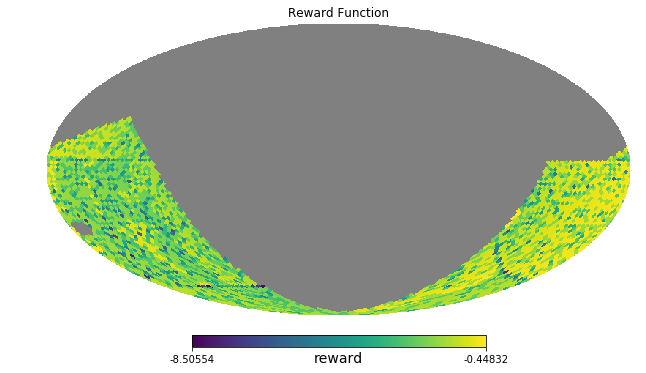

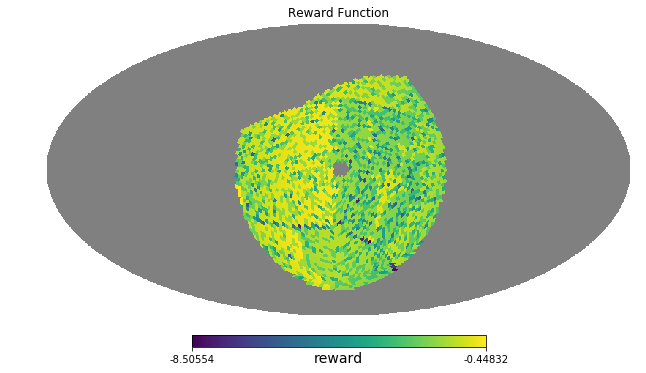

In [14]:
hp.mollview(survey.calc_reward_function(), title='Reward Function', unit='reward')
plt.savefig('final_reward.pdf')
hp.mollview(survey.calc_reward_function(), title='Reward Function', unit='reward', rot=rot)
plt.savefig('final_reward_altaz.pdf')

In [15]:
status = observatory.return_status()
status

/Users/yoachim/gitRepos/sims_seeingModel/python/lsst/sims/seeingModel/seeingModel.py:133: RuntimeWarning: invalid value encountered in power
  airmass_correction = np.power(airmass, 0.6)


{'FWHM_geometric_g': array([        nan,         nan,         nan, ...,  0.89175264,
         0.89482945,  0.92666154]),
 'FWHM_geometric_i': array([        nan,         nan,         nan, ...,  0.8848142 ,
         0.88786559,  0.91943467]),
 'FWHM_geometric_r': array([        nan,         nan,         nan, ...,  0.82332234,
         0.82614842,  0.85538656]),
 'FWHM_geometric_u': array([        nan,         nan,         nan, ...,  1.19285935,
         1.1970394 ,  1.2402854 ]),
 'FWHM_geometric_y': array([        nan,         nan,         nan, ...,  0.95655181,
         0.95986604,  0.99415445]),
 'FWHM_geometric_z': array([        nan,         nan,         nan, ...,  0.8215714 ,
         0.82439107,  0.85356284]),
 'FWHMeff_g': array([        nan,         nan,         nan, ...,  1.02159688,
         1.02533996,  1.06406514]),
 'FWHMeff_i': array([        nan,         nan,         nan, ...,  1.01315596,
         1.01686811,  1.05527333]),
 'FWHMeff_r': array([        nan,         nan,

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


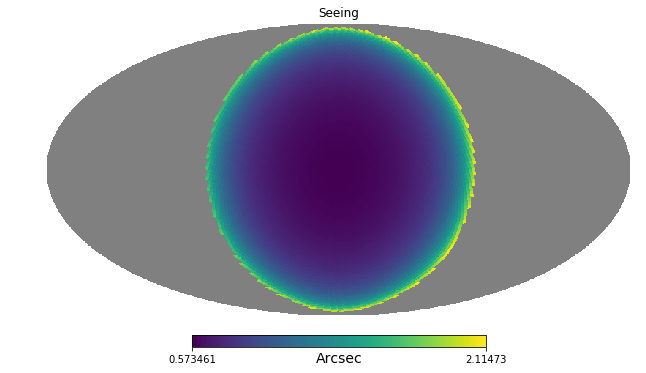

In [16]:
hp.mollview(status['FWHM_geometric_r'], title='Seeing', unit='Arcsec', rot=rot)
plt.savefig('seeing.pdf')

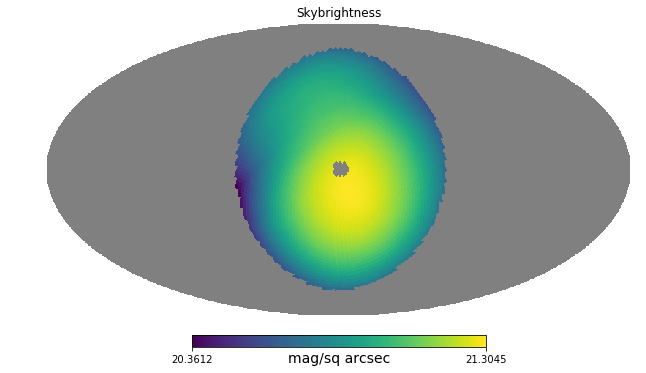

In [17]:
hp.mollview(status['skybrightness']['r'], title='Skybrightness', unit='mag/sq arcsec', rot=rot)
plt.savefig('skyb.pdf')

In [18]:
# OK, now let's do a three-tiered survey, with a DD field, block scheduler, and greedy snake


# All the DD surveys
dd_surveys = fs.generate_dd_surveys(nside=nside)

In [19]:
# Same basis functions as before
bfs = []
bfs.append(fs.M5_diff_basis_function(filtername=filtername, nside=nside))
bfs.append(fs.Target_map_basis_function(filtername=filtername,
                                            target_map=target_map,
                                            out_of_bounds_val=hp.UNSEEN, nside=nside,
                                            norm_factor=norm_factor))
bfs.append(fs.Slewtime_basis_function(filtername=filtername, nside=nside))

weights = [1., 1., 0.3]

In [20]:
# Take pairs in the same filter, ignore the DD observations
block_survey = fs.Blob_survey(bfs, weights, filtername=filtername, filter2=filtername,
                              survey_note='blob', ignore_obs='DD')

In [21]:
# Take observations one at a time
snake_survey = fs.Greedy_survey_fields(bfs, weights, block_size=1, filtername=filtername,
                                       dither=True, nside=nside, ignore_obs='DD')

In [22]:
# put in as list-of-lists. 
scheduler = fs.Core_scheduler([dd_surveys, [block_survey], [snake_survey]], nside=nside)

In [23]:
# reinitialize the observatory
observatory = Speed_observatory(nside=nside, quickTest=True)

In [24]:
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='example3_%iyrs.db' % years,
                                                     delete_past=True)

/Users/yoachim/gitRepos/sims_seeingModel/python/lsst/sims/seeingModel/seeingModel.py:133: RuntimeWarning: invalid value encountered in power
  airmass_correction = np.power(airmass, 0.6)


progress = 27.4%

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:313: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:229: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')


progress = 99.9%Skipped 0 observations
Completed 17356 observations


In [25]:
# Even with filter changes, managed to get more observations!
np.unique(observations['note'])

array(['', 'DD:COSMOS', 'DD:ECDFS', 'DD:XMM-LSS', 'DD:u,COSMOS',
       'DD:u,ECDFS', 'DD:u,XMM-LSS', 'blob, a', 'blob, b'],
      dtype='<U40')

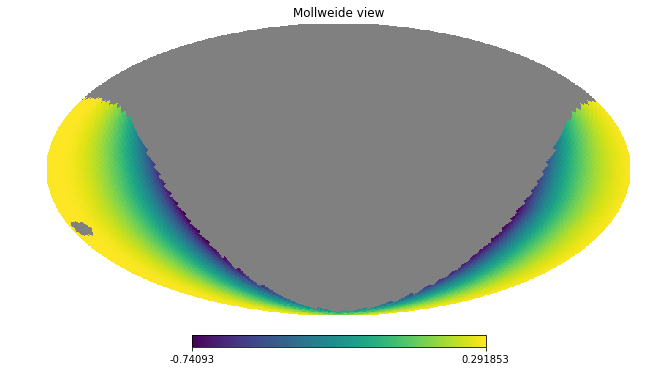

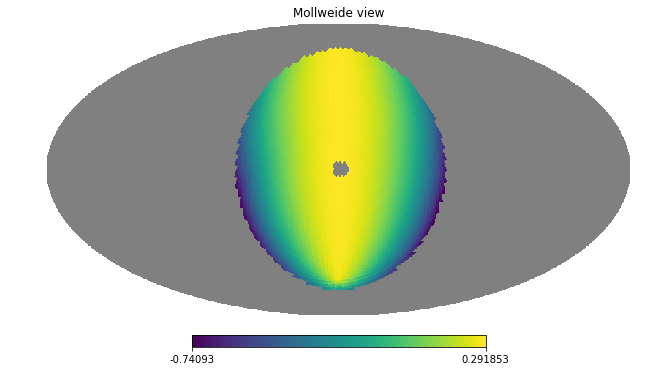

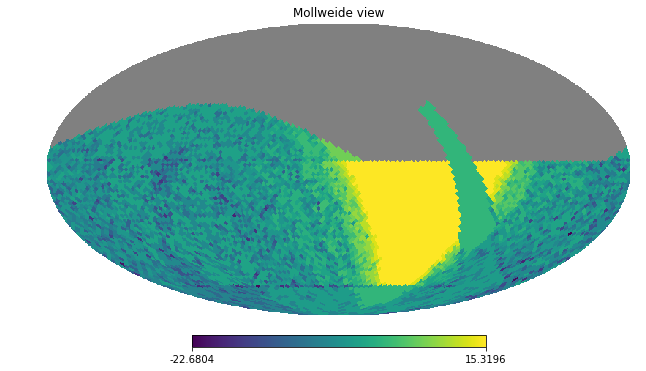

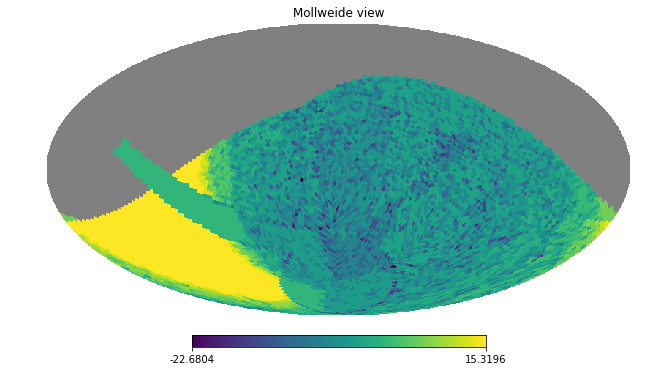

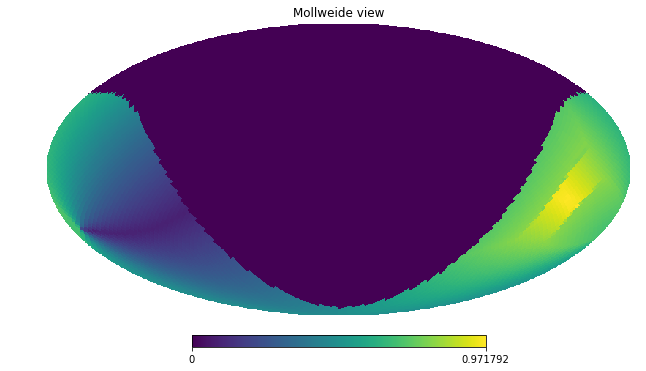

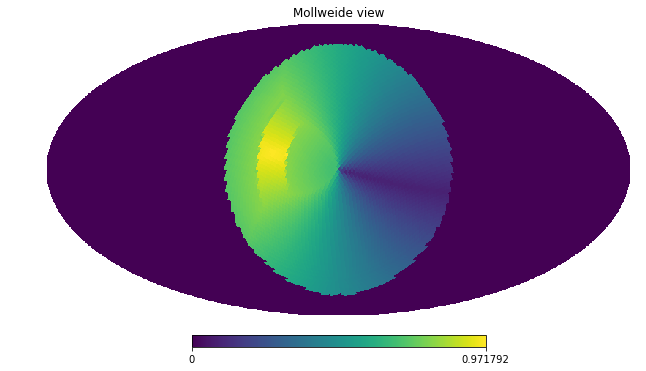

In [26]:
for bf in bfs:
    hp.mollview(bf())
    hp.mollview(bf(), rot=rot)

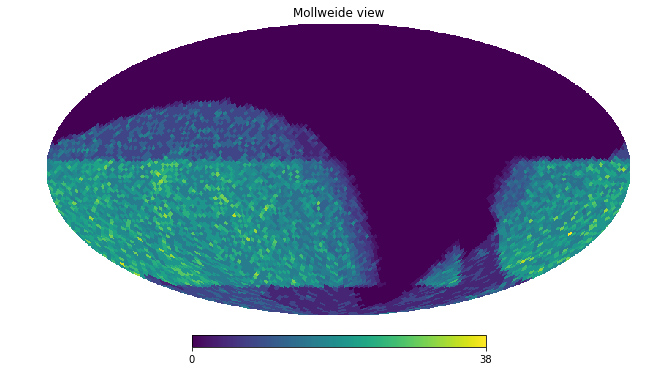

In [27]:
hp.mollview(bfs[1].survey_features['N_obs'].feature)

In [28]:
hp.nside2resol(nside, arcmin=True)/60.  #In degrees

1.8322594196359498

In [29]:
hp.nside2npix(nside), snake_survey.fields.size

(12288, 5292)

In [31]:
help(hp.mollview)

Help on function mollview in module healpy.visufunc:

mollview(map=None, fig=None, rot=None, coord=None, unit='', xsize=800, title='Mollweide view', nest=False, min=None, max=None, flip='astro', remove_dip=False, remove_mono=False, gal_cut=0, format='%g', format2='%g', cbar=True, cmap=None, notext=False, norm=None, hold=False, margins=None, sub=None, return_projected_map=False)
    Plot an healpix map (given as an array) in Mollweide projection.
    
    Parameters
    ----------
    map : float, array-like or None
      An array containing the map, supports masked maps, see the `ma` function.
      If None, will display a blank map, useful for overplotting.
    fig : int or None, optional
      The figure number to use. Default: create a new figure
    rot : scalar or sequence, optional
      Describe the rotation to apply.
      In the form (lon, lat, psi) (unit: degrees) : the point at
      longitude *lon* and latitude *lat* will be at the center. An additional rotation
      of an